In [1]:
from scipy import misc
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt

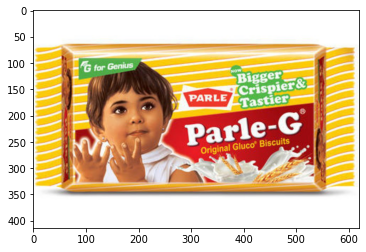

In [2]:
packet = plt.imread("Parle-G.jpg") # Paste address of image
plt.imshow(packet, cmap = plt.get_cmap('gray'))
plt.show()

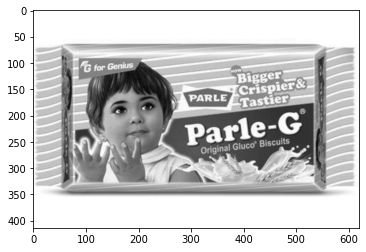

In [14]:
packet_gray = np.dot(packet[...,:3], [0.299, 0.587, 0.114])
plt.imshow(packet_gray, cmap = plt.get_cmap('gray'))
plt.show()

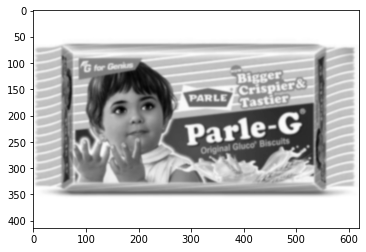

In [4]:
# Blur the grayscale image so that only important edges are extracted and the noisy ones ignored
packet_gray_blurred = ndimage.gaussian_filter(packet_gray, sigma=1.4) # Note that the value of sigma is image specific so please tune it
plt.imshow(packet_gray_blurred, cmap = plt.get_cmap('gray'))
plt.show()

In [5]:
def SobelFilter(img, direction):
    if(direction == 'x'):
        Gx = np.array([[-1,0,+1], [-2,0,+2],  [-1,0,+1]])
        Res = ndimage.convolve(img, Gx)
        #Res = ndimage.convolve(img, Gx, mode='constant', cval=0.0)
    if(direction == 'y'):
        Gy = np.array([[-1,-2,-1], [0,0,0], [+1,+2,+1]])
        Res = ndimage.convolve(img, Gy)
        #Res = ndimage.convolve(img, Gy, mode='constant', cval=0.0)
    
    return Res

In [6]:
def Normalize(img):
    #img = np.multiply(img, 255 / np.max(img))
    img = img/np.max(img)
    return img

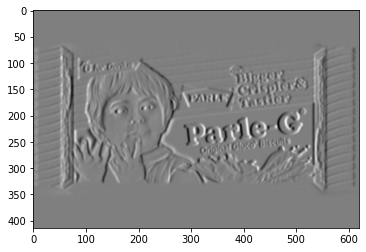

In [8]:
gx = SobelFilter(packet_gray_blurred, 'x')
gx = Normalize(gx)
plt.imshow(gx, cmap = plt.get_cmap('gray'))
plt.show()

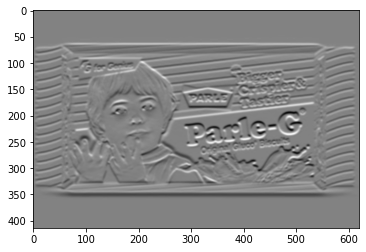

In [9]:
gy = SobelFilter(packet_gray_blurred, 'y')
gy = Normalize(gy)
plt.imshow(gy, cmap = plt.get_cmap('gray'))
plt.show()

In [11]:
dx = ndimage.sobel(packet_gray_blurred, axis=1) # horizontal derivative
dy = ndimage.sobel(packet_gray_blurred, axis=0) # vertical derivative

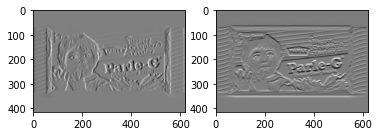

In [12]:
plt.subplot(121)
plt.imshow(dx, cmap = plt.get_cmap('gray'))
plt.subplot(122)
plt.imshow(dy, cmap = plt.get_cmap('gray'))
plt.show()

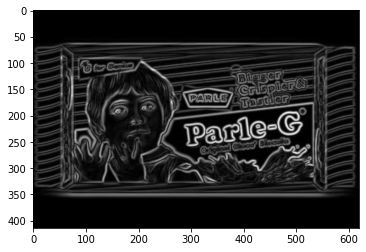

In [13]:
Mag = np.hypot(gx,gy)
Mag = Normalize(Mag)
plt.imshow(Mag, cmap = plt.get_cmap('gray'))
plt.show()